In [1]:
from sklearn.datasets import load_digits

data = load_digits()

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()

X = digits.data
y = digits.target
images = digits.images

print(X.shape)
print(y.shape)
print(images.shape)
print(np.unique(y))


(1797, 64)
(1797,)
(1797, 8, 8)
[0 1 2 3 4 5 6 7 8 9]


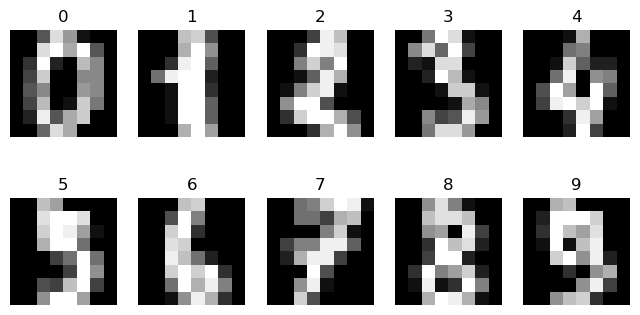

In [2]:
plt.figure(figsize=(8, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(str(y[i]))
    plt.axis("off")
plt.show()


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

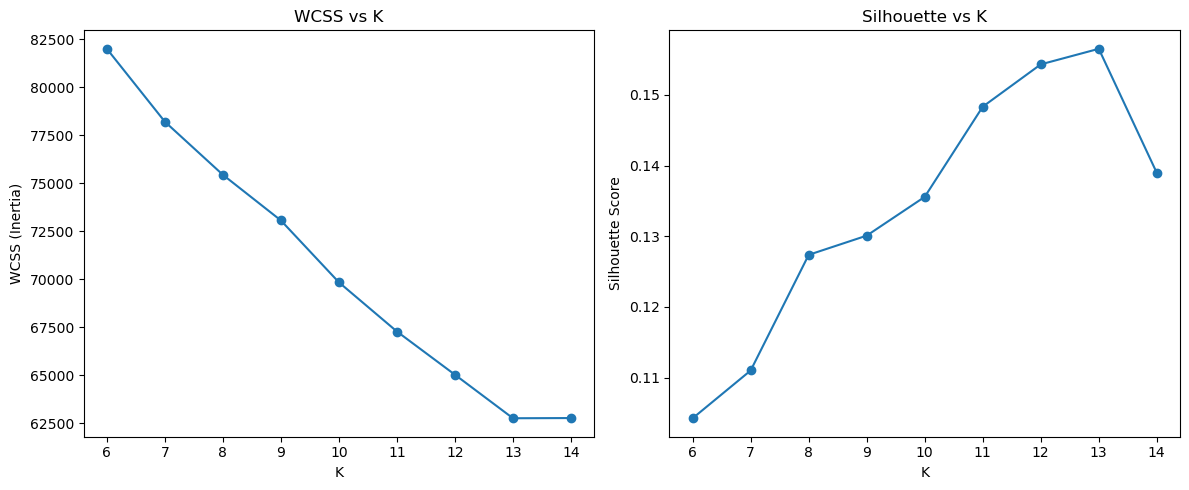

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

Km = range(6, 15)

wcss_list = []
silhouette_list = []

for k in Km:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    wcss_list.append(kmeans.inertia_)

    silhouette = silhouette_score(X_scaled, labels)
    silhouette_list.append(silhouette)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(Km, wcss_list, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS (Inertia)")
plt.title("WCSS vs K")

plt.subplot(1,2,2)
plt.plot(Km, silhouette_list, marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette vs K")

plt.tight_layout()
plt.show()


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score , normalized_mutual_info_score
import numpy as np

K = 13
n_runs = 10

inertias = []
labels_list = []

for seed in range(n_runs):
    kmeans = KMeans(
        n_clusters=K,
        init='k-means++',
        n_init=1,
        random_state=seed
    )
    kmeans.fit(X_scaled)

    inertias.append(kmeans.inertia_)
    labels_list.append(kmeans.labels_)

print("Inertias for different runs:")
for i, val in enumerate(inertias):
    print(f"Run {i}: inertia = {val:.2f}")

print("\nMin inertia:", np.min(inertias))
print("Max inertia:", np.max(inertias))

print("\nAdjusted Rand Index (ARI) between run 0 and others:")
for i in range(1, n_runs):
    ari = adjusted_rand_score(labels_list[0], labels_list[i])
    print(f"Run 0 vs Run {i}: ARI = {ari:.3f}")


Inertias for different runs:
Run 0: inertia = 63638.62
Run 1: inertia = 65005.25
Run 2: inertia = 63596.79
Run 3: inertia = 65062.08
Run 4: inertia = 66141.41
Run 5: inertia = 65967.35
Run 6: inertia = 65350.44
Run 7: inertia = 63447.50
Run 8: inertia = 65037.14
Run 9: inertia = 65455.72

Min inertia: 63447.499644350384
Max inertia: 66141.41084979924

Adjusted Rand Index (ARI) between run 0 and others:
Run 0 vs Run 1: ARI = 0.721
Run 0 vs Run 2: ARI = 0.773
Run 0 vs Run 3: ARI = 0.824
Run 0 vs Run 4: ARI = 0.694
Run 0 vs Run 5: ARI = 0.645
Run 0 vs Run 6: ARI = 0.628
Run 0 vs Run 7: ARI = 0.772
Run 0 vs Run 8: ARI = 0.722
Run 0 vs Run 9: ARI = 0.713


In [6]:
from scipy.optimize import linear_sum_assignment
import numpy as np

K = 13

kmeans = KMeans(n_clusters=K, init="k-means++", random_state=42)
labels = kmeans.fit_predict(X_scaled)

ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)

confusion = np.zeros((K, K), dtype=int)
for c_true, c_pred in zip(y, labels):
    confusion[c_true, c_pred] += 1

row_ind, col_ind = linear_sum_assignment(-confusion)

correct = confusion[row_ind, col_ind].sum()
accuracy = correct / len(y)

print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Cluster Accuracy after Hungarian Mapping:", accuracy)



Adjusted Rand Index (ARI): 0.5505648583536152
Normalized Mutual Information (NMI): 0.678327100796514
Cluster Accuracy after Hungarian Mapping: 0.6599888703394546
